## Survey Chatbots - Data cleaning

In [1]:
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline

In [38]:
data = pd.read_csv('Chatbots.csv')#, encoding='utf-16')

In [39]:
data.head(3)

,Marca temporal,"Consentimiento informado para la participación en el estudio\n \nGracias por su interés en este estudio sobre el uso de chatbots (programas que simulan una conversación humana para proporcionar información o realizar tareas) que utilizan Inteligencia Artificial (concretamente, modelos grandes de lenguaje, o LLMs) para mejorar la enseñanza y el aprendizaje. Su participación nos ayudará a entender cómo estas herramientas impactan la experiencia educativa.\nResponder el cuestionario tomará aprox. 5-7 minutos. La participación es voluntaria y el proceso se puede interrumpir en cualquier momento sin explicaciones. Todas las respuestas serán anónimas y los datos se utilizarán exclusivamente para fines académicos y de investigación.\n \nSi ha entendido la información y desea participar en la encuesta, seleccione ""Quiero participar"".\nSi no desea participar, cierre la ventana del navegador.\n\nMuchas gracias por su tiempo y colaboración.\nEl equipo del proyecto ""Uso de Chatbots basados en LLM para la mejora docente"" (Código 24-146).\nUniversidad de Granada",¿Cuál es su perfil?,¿Qué medios de comunicación usa en el contexto universitario?,"¿Cómo prefiere la interacción con el profesorado (clases, tutorías...)?","Valore la importancia de las siguientes características de la interacción con el profesorado (clases, tutorías...). [Retroalimentación constructiva]","Valore la importancia de las siguientes características de la interacción con el profesorado (clases, tutorías...). [Accesibilidad a través de diferentes medios (correo, chat, etc.)]","Valore la importancia de las siguientes características de la interacción con el profesorado (clases, tutorías...). [La rapidez en la respuesta]","Valore la importancia de las siguientes características de la interacción con el profesorado (clases, tutorías...). [Personalización de las respuestas]","Valore la importancia de las siguientes características de la interacción con el profesorado (clases, tutorías...). [Confianza en las respuestas]",...,Lea y valore las siguientes afirmaciones sobre chatbots. [Los chatbots pueden ofrecer explicaciones claras y comprensibles sobre temas complejos.].1,Lea y valore las siguientes afirmaciones sobre chatbots. [El uso de chatbots conduce a una falta de pensamiento crítico.].1,Lea y valore las siguientes afirmaciones sobre chatbots. [Los chatbots manejan correctamente los datos sensibles.].1,Lea y valore las siguientes afirmaciones sobre chatbots. [Los chatbots pueden ayudar a mejorar las habilidades de estudio y aprendizaje.].1,Lea y valore las siguientes afirmaciones sobre chatbots. [Los chatbots proporcionan respuestas confiables y precisas a mis preguntas académicas.].1,Lea y valore las siguientes afirmaciones sobre chatbots. [Los chatbots tienen un problema de privacidad.].1,¿Cuál es su campo de estudio/área de trabajo?,¿Qué edad tiene?,¿Con qué género se identifica?,Déjenos aquí cualquier comentario que quiera hacernos llegar sobre esta encuesta.
0,2024/12/17 11:42:52 a. m. CET,Quiero participar.,Estudiante (de grado),Correo electrónico;Plataforma de gestión del a...,Videoconferencias en tiempo real;Clases presen...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,...,NaN,NaN,NaN,NaN,NaN,NaN,Historia y Artes,18,Femenino,NaN
1,2024/12/17 12:20:23 p. m. CET,Quiero participar.,Docente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Más bien de acuerdo,Completamente de acuerdo,Más bien en desacuerdo,Más bien de acuerdo,Más bien en desacuerdo,Completamente de acuerdo,"Ingenierías de la Comunicación, Computación y ...",53,Masculino,NaN
2,2024/12/17 12:31:31 p. m. CET,Quiero participar.,Estudiante (de posgrado),Correo electrónico;Plataforma de gestión del a...,Mensajes en plataformas de aprendizaje;Correos...,Poco importante,Poco importante,Importante,Importante,Muy importante,...,NaN,NaN,NaN,NaN,NaN,NaN,"Ingenierías de la Comunicación, Computación y ...",23,Masculino,Debe implementarse pero ya la educación imple...


In [40]:
len(data)

91

In [41]:
data['¿Cuál es su perfil?'].value_counts()

¿Cuál es su perfil?
Estudiante (de grado)       72
Estudiante (de posgrado)    11
Docente                      8
Name: count, dtype: int64

In [42]:
data_doc = data[data['¿Cuál es su perfil?'] == 'Docente']

In [45]:
data_est = data[data['¿Cuál es su perfil?'] != 'Docente']

In [48]:
data_est = data_est.replace({'Muy importante': 5, 
              'Importante': 4,
              'Neutral': 3,
             'Poco importante': 2,
             'Nada importante': 1,
                 'Completamente de acuerdo': 5, 
              'Más bien de acuerdo': 4,
              'Ni estoy de acuerdo ni en desacuerdo': 3,
             'Más bien en desacuerdo': 2,
             'Estoy en desacuerdo': 1})

In [33]:
data_doc.to_excel('Chatbots_Doc.xlsx')

In [49]:
data_est.to_excel('Chatbots_Est.xlsx')

### Tests entfernen

In [122]:
ind_test = []
for j, wert in enumerate(data['D-Q34']):
    if 'Martina' in str(wert):
        ind_test.append(j)

In [123]:
ind_test

[180]

In [124]:
data['D-Q34'].loc[180]

'Encuesta realizada en español y alemán por Martina'

In [125]:
data = data.drop(ind_test).reset_index(drop=True)

In [126]:
data[data['A-Q5'] > 51].index

Index([179, 186, 400], dtype='int64')

In [127]:
data.loc[400]

Antwort_ID                           413
Datum_Abgeschickt    2022-11-16 20:26:09
Letzte_Seite                           4
Start-Sprache                de-informal
Zufallswert                   1581276687
                            ...         
D-Q33_4                              NaN
D-Q33_5                              NaN
D-Q33_6                              NaN
D-Q33_7                              NaN
D-Q34                                NaN
Name: 400, Length: 228, dtype: object

In [128]:
ind_test2 = []
for j, wert in enumerate(data['Antwort_ID']):
    if '413' in str(wert):
        ind_test2.append(j)

In [129]:
ind_test2

[400]

In [130]:
data = data.drop(ind_test2).reset_index(drop=True)

In [131]:
len(data)

485

### Finished questionnaires

In [132]:
len(data)

485

In [133]:
data['Letzte_Seite'].value_counts()

Letzte_Seite
4    283
2     34
3     33
1     27
0      5
Name: count, dtype: int64

In [134]:
Finished = data[(data['Letzte_Seite'] == 3) | (data['Letzte_Seite'] == 4)].reset_index(drop=True)
Finished.head(3)

,Antwort_ID,Datum_Abgeschickt,Letzte_Seite,Start-Sprache,Zufallswert,Datum_Start,Datum_Ende,A-Q1_O,A-Q1,A-Q2_1,...,D-Q31_13,D-Q32,D-Q33_1,D-Q33_2,D-Q33_3,D-Q33_4,D-Q33_5,D-Q33_6,D-Q33_7,D-Q34
0,12,2022-09-15 20:28:31,4,de-informal,1478431875,2022-09-15 20:12:01,2022-09-15 20:28:31,Ich unterrichte in der Ukraine.,Ukraine,Ja,...,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wenn es möglich wäre. machen sie das Angebot z...
1,14,2022-09-15 20:26:51,4,de-informal,655161505,2022-09-15 20:13:55,2022-09-15 20:26:51,In der Ukraine,Ukraine,NaN,...,NaN,Ja,NaN,Ja,NaN,Ja,NaN,NaN,NaN,"Es war sehr interessant, diese Fragen zu beant..."
2,16,2022-09-15 20:29:26,4,de-informal,1254767850,2022-09-15 20:19:14,2022-09-15 20:29:26,Die Ukraine,Ukraine,NaN,...,NaN,Ja,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN


In [135]:
len(Finished)

316

### Finding questionnaires with missing values

In [136]:
def count_Ja(row):
    cnt = 0
    for el in row:
        if (str(el) == 'Ja'):
            cnt = cnt + 1
    return cnt*100/len(row)

In [137]:
porc_ja = []
for i in range(Finished.shape[0]):
    porc_ja.append(count_Ja(Finished.loc[i]))

In [138]:
Finished['porc_ja'] = porc_ja

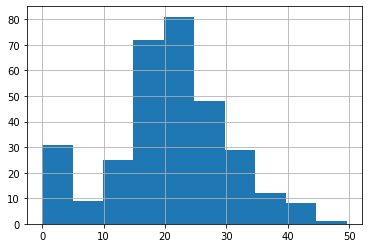

In [139]:
Finished['porc_ja'].hist();

In [140]:
Finished[Finished['porc_ja'] < 5].index

Index([  3,  20,  53,  54,  55,  56,  70,  76,  78,  79,  84,  92, 103, 123,
       131, 142, 147, 160, 163, 170, 177, 249, 252, 261, 276, 277, 286, 294,
       295, 297, 311],
      dtype='int64')

In [141]:
ind_emp = Finished[Finished['porc_ja'] < 5].index

In [142]:
Finished = Finished.drop(ind_emp).reset_index(drop=True)

In [143]:
Finished[Finished['porc_ja'] < 10].index

Index([32, 58, 65, 72, 83, 100, 107, 129, 207], dtype='int64')

IDs with a low proportion of affirmative answers were checked. IDs 107 and 207 were found to be invalid.

In [144]:
ind_inv = [107, 207]

In [145]:
Finished = Finished.drop(ind_inv).reset_index(drop=True)

In [146]:
len(Finished)

283

### Art der Werte kontrollieren und anpassen

In [106]:
Finished.dtypes

Antwort_ID            object
Datum_Abgeschickt     object
Letzte_Seite          object
Start-Sprache         object
Zufallswert           object
                      ...   
D-Q33_5               object
D-Q33_6               object
D-Q33_7               object
D-Q34                 object
porc_ja              float64
Length: 229, dtype: object

Hauptsächlich strings + nans, nur eine Frage, in der Umwandlung in nummerische Werte sinnvoll wäre.

Nans in 0 umwandeln?

In [107]:
Finished['A-Q5'].dtypes

dtype('O')

In [108]:
def Werte_numm(s):
    return pd.to_numeric(s, downcast='integer')

In [109]:
#Werte_numm(Finished[el]) funktioniert nicht

### Daten speichern

In [110]:
#Finished.to_pickle('C:\Users\Martina\Code\LATILL\Daten\survey_results') funktioniert nicht

In [147]:
Finished.to_pickle('results_survey_clean')

In [148]:
Finished.to_excel('results_survey_clean.xlsx')

In [149]:
gloss.to_pickle('gloss_survey')